In [1]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit


DATA_DIR = "data/datasets/"

summer = pd.read_csv(DATA_DIR+'validation_set_summer.csv', index_col=0, parse_dates = ['timestamp'])
winter = pd.read_csv(DATA_DIR+'validation_set_winter.csv', index_col=0, parse_dates = ['timestamp'])

In [3]:
print('len summer =',len(summer))
print('len winter =',len(winter))

len summer = 79827
len winter = 41049


In [6]:
print('summer start  = ', summer.timestamp.min())
print('summer end    = ', summer.timestamp.max())
print('winter start  = ', winter.timestamp.min())
print('winter end    = ', winter.timestamp.max())

summer start  =  2019-05-11 01:36:25
summer end    =  2019-06-09 06:27:16
winter start  =  2019-02-01 02:00:36
winter end    =  2019-04-04 09:06:11


### Observation Specific Statistics

In [12]:
# Vessel type distribution
print('Summer vessel type distribution')
print(summer.vessel_type.dropna().value_counts(normalize=True) * 100)
print('\nWinter vessel type distribution')
print(winter.vessel_type.dropna().value_counts(normalize=True) * 100)

Summer vessel type distribution
GC      57.662194
T       17.247297
PAS     14.418680
RORO     8.155135
CONT     2.516692
Name: vessel_type, dtype: float64

Winter vessel type distribution
GC      73.626641
RORO    14.658092
CONT    10.204877
T        1.510390
Name: vessel_type, dtype: float64


In [13]:
print('Summer AIS Mean speed:', summer.speed.mean())
print('Summer AIS Median speed:', summer.speed.median())
print('')
print('Winter AIS Mean speed:', winter.speed.mean())
print('Winter AIS Median speed:', winter.speed.median())

Summer AIS Mean speed: 6.043100281866516
Summer AIS Median speed: 5.76

Winter AIS Mean speed: 6.257367459311778
Winter AIS Median speed: 6.28


In [17]:
ais_types = summer.groupby('vessel_type')

print('Summer vessel speed by types')
for vessel_type, observations in ais_types:
    print(vessel_type + ' Mean speed:', summer.speed.mean())
    print(vessel_type + ' Median speed:', summer.speed.median())

Summer vessel speed by types
CONT Mean speed: 6.043100281866516
CONT Median speed: 5.76
GC Mean speed: 6.043100281866516
GC Median speed: 5.76
PAS Mean speed: 6.043100281866516
PAS Median speed: 5.76
RORO Mean speed: 6.043100281866516
RORO Median speed: 5.76
T Mean speed: 6.043100281866516
T Median speed: 5.76


In [18]:
ais_types = summer.groupby('vessel_type')
print('Winter vessel speed by types')

for vessel_type, observations in ais_types:
    print(vessel_type + ' Mean speed:', winter.speed.mean())
    print(vessel_type + ' Median speed:', winter.speed.median())

Winter vessel speed by types
CONT Mean speed: 6.257367459311778
CONT Median speed: 6.28
GC Mean speed: 6.257367459311778
GC Median speed: 6.28
PAS Mean speed: 6.257367459311778
PAS Median speed: 6.28
RORO Mean speed: 6.257367459311778
RORO Median speed: 6.28
T Mean speed: 6.257367459311778
T Median speed: 6.28


### Visualisation

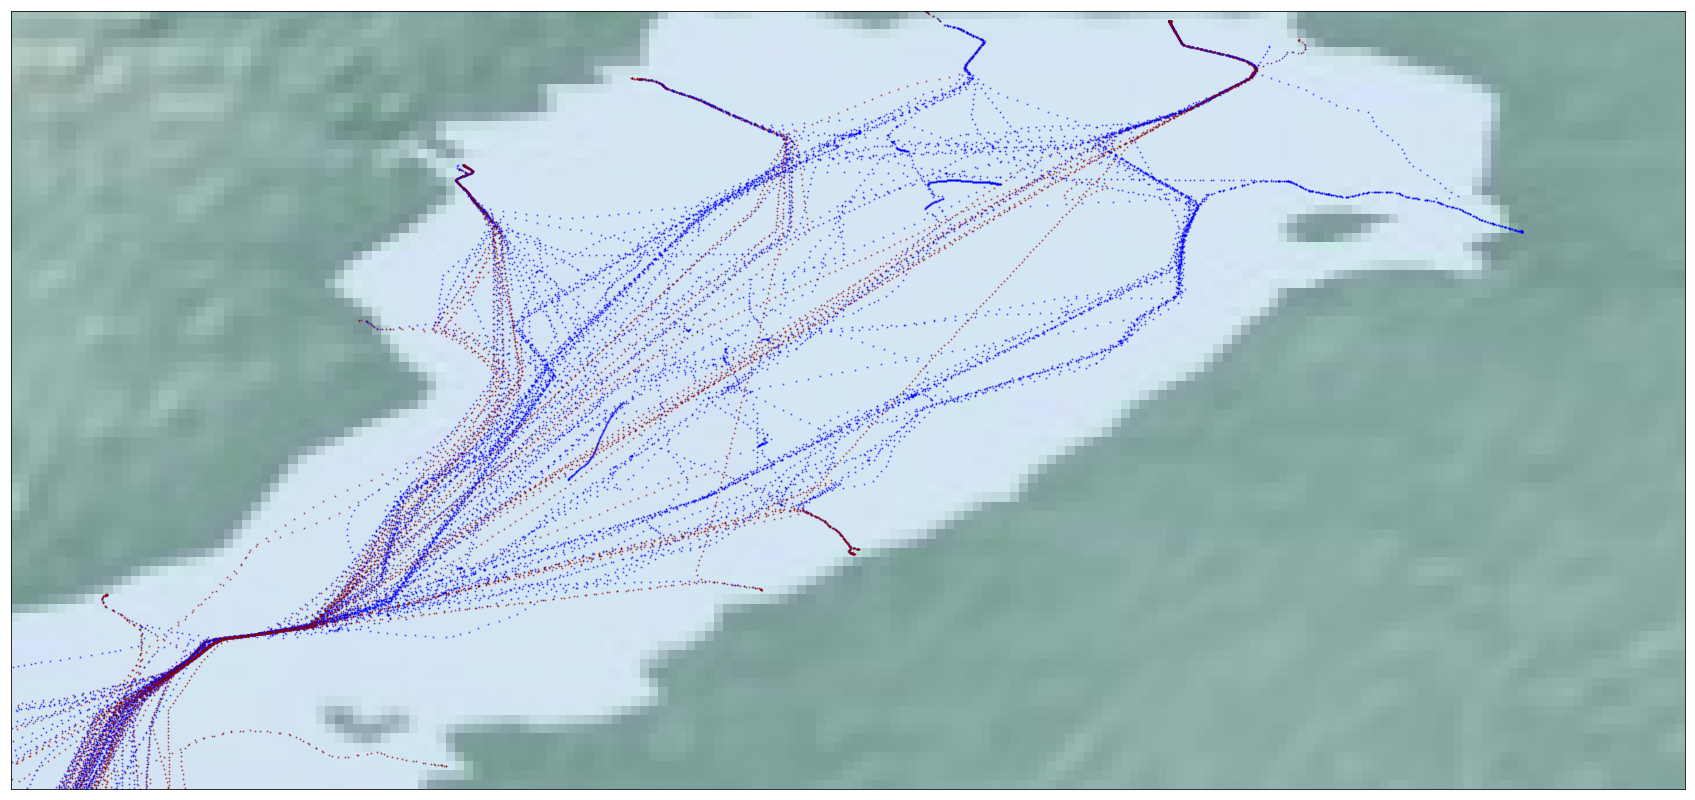

In [49]:
fig = plt.figure(figsize=(30,30))
m = Basemap(llcrnrlon = 20,llcrnrlat = 63, urcrnrlon = 26,
       urcrnrlat = summer.lat.max(),
       resolution='l')
m.shadedrelief()

xy = winter.loc[winter.lat > 63].loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='blue', alpha=0.5, markersize=1)

xy = summer.loc[summer.lat > 63].loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='darkred', alpha=0.5, markersize=1)

plt.show()